In [2]:
import zipfile


!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-09-15 16:26:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.207, 172.217.219.207, 209.85.146.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   214MB/s    in 0.5s    

2023-09-15 16:26:01 (214 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



in this motherfucker project, i am trying to create a CNN model,for classifying images,into 2 groups,steak or pizza

In [3]:
!ls

pizza_steak  pizza_steak.zip  pizza_steak.zip.1  sample_data


lets create a image data generator

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
!ls pizza_steak

test  train


In [7]:
!ls pizza_steak/train

pizza  steak


In [8]:
import os

lets examine the dataset
and create a function,for randomly,plotting an image

In [9]:
import matplotlib.image as mpimg
import random

def random_show(directory, img_class):
    folder = directory + "/" + img_class + "/"
    random_pic = random.sample(os.listdir(folder), 1)[0]
    img_path = os.path.join(folder, random_pic)
    img = mpimg.imread(img_path)
    print(img.shape)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


(512, 384, 3)


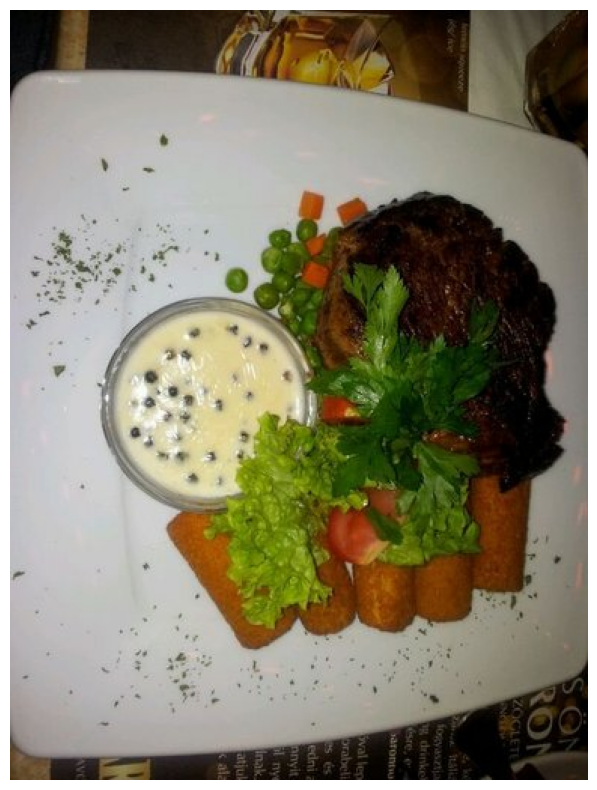

In [10]:
random_show("pizza_steak/train","steak")

fuck!!!!!!!!!!!

i got hungry by watching these motherfucker pictures

In [11]:
train_data_generator = ImageDataGenerator(rescale=1./255.)
test_data_generator = ImageDataGenerator(rescale=1./255.)

In [12]:
train_data_path = "./pizza_steak/train"
test_data_path = "./pizza_steak/test"

In [13]:
tf.random.set_seed(85)

In [14]:
from tensorflow.python import test
train_data = train_data_generator.flow_from_directory(train_data_path,
                                                      shuffle=True,
                                                      target_size=(256,256),
                                                      batch_size=32,
                                                      class_mode="binary"
                                                      )

test_data = test_data_generator.flow_from_directory(test_data_path,
                                                    shuffle=True,
                                                    target_size=(256,256),
                                                    batch_size=32,
                                                    class_mode="binary"
                                                    )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


now,lets create our cnn model

In [15]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,
                                  input_shape=(256,256,3),
                                  activation= tf.keras.activations.relu))

model1.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,
                                  activation= tf.keras.activations.relu))

model1.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding="valid"))


model1.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,

                                  activation= tf.keras.activations.relu))

model1.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,
                                  activation= tf.keras.activations.relu))

model1.add(tf.keras.layers.MaxPool2D(pool_size=2))

model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid))

In [16]:
model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

now,lets fit the model

In [17]:
history1 = model1.fit(train_data,
           epochs=10,
           validation_data=test_data,
           validation_steps=(0.2*len(test_data)),
                             verbose=2)

Epoch 1/10
47/47 - 12s - loss: 0.6475 - accuracy: 0.6353 - val_loss: 0.5610 - val_accuracy: 0.7031 - 12s/epoch - 250ms/step
Epoch 2/10
47/47 - 5s - loss: 0.5190 - accuracy: 0.7733 - val_loss: 0.4330 - val_accuracy: 0.8203 - 5s/epoch - 110ms/step
Epoch 3/10
47/47 - 5s - loss: 0.4544 - accuracy: 0.7987 - val_loss: 0.4806 - val_accuracy: 0.7656 - 5s/epoch - 106ms/step
Epoch 4/10
47/47 - 6s - loss: 0.4269 - accuracy: 0.8233 - val_loss: 0.3319 - val_accuracy: 0.9219 - 6s/epoch - 129ms/step
Epoch 5/10
47/47 - 6s - loss: 0.3768 - accuracy: 0.8460 - val_loss: 0.2805 - val_accuracy: 0.9062 - 6s/epoch - 127ms/step
Epoch 6/10
47/47 - 5s - loss: 0.3345 - accuracy: 0.8573 - val_loss: 0.2372 - val_accuracy: 0.9375 - 5s/epoch - 105ms/step
Epoch 7/10
47/47 - 5s - loss: 0.2823 - accuracy: 0.8867 - val_loss: 0.3274 - val_accuracy: 0.8750 - 5s/epoch - 116ms/step
Epoch 8/10
47/47 - 6s - loss: 0.2318 - accuracy: 0.9093 - val_loss: 0.2722 - val_accuracy: 0.8750 - 6s/epoch - 132ms/step
Epoch 9/10
47/47 - 6s 

now,lets evaluate on full test data

In [18]:
model1.evaluate(test_data)

16/16 [==============================] - 2s 134ms/step - loss: 0.5250 - accuracy: 0.8300


[0.5249714255332947, 0.8299999833106995]

looks like our model is overfitting a lot

lets see if we can imporva it

<Axes: >

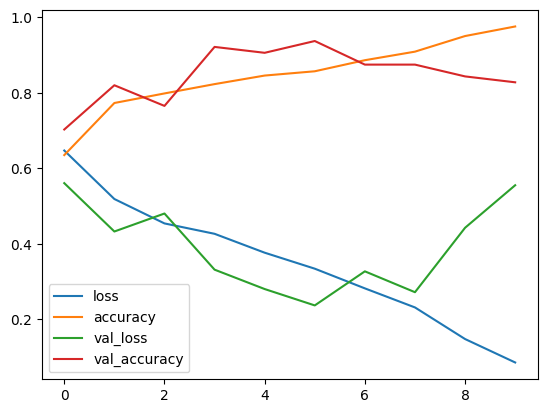

In [19]:
pd.DataFrame(history1.history).plot()

now lets create another model

In [20]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,
                                  input_shape=(256,256,3),
                                  activation= tf.keras.activations.relu))

model2.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,
                                  activation= tf.keras.activations.relu))

model2.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding="valid"))


model2.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,

                                  activation= tf.keras.activations.relu))

model2.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,
                                  activation= tf.keras.activations.relu))

model2.add(tf.keras.layers.MaxPool2D(pool_size=2))

model2.add(tf.keras.layers.Conv2D(filters=10,
                                  kernel_size=3,
                                  activation= tf.keras.activations.relu))

model2.add(tf.keras.layers.MaxPool2D(pool_size=2))

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid))

In [21]:
model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

In [22]:
history2 = model2.fit(train_data,
           epochs=10,
           validation_data=test_data,
           validation_steps=(0.2*len(test_data)),
                             verbose=2)

Epoch 1/10
47/47 - 8s - loss: 0.6025 - accuracy: 0.6540 - val_loss: 0.4178 - val_accuracy: 0.8438 - 8s/epoch - 161ms/step
Epoch 2/10
47/47 - 6s - loss: 0.4504 - accuracy: 0.8060 - val_loss: 0.3963 - val_accuracy: 0.8281 - 6s/epoch - 130ms/step
Epoch 3/10
47/47 - 5s - loss: 0.4015 - accuracy: 0.8193 - val_loss: 0.3762 - val_accuracy: 0.8047 - 5s/epoch - 110ms/step
Epoch 4/10
47/47 - 6s - loss: 0.4031 - accuracy: 0.8260 - val_loss: 0.3302 - val_accuracy: 0.8594 - 6s/epoch - 124ms/step
Epoch 5/10
47/47 - 5s - loss: 0.4122 - accuracy: 0.8300 - val_loss: 0.3562 - val_accuracy: 0.8594 - 5s/epoch - 110ms/step
Epoch 6/10
47/47 - 5s - loss: 0.4119 - accuracy: 0.8140 - val_loss: 0.3858 - val_accuracy: 0.8203 - 5s/epoch - 110ms/step
Epoch 7/10
47/47 - 5s - loss: 0.3706 - accuracy: 0.8387 - val_loss: 0.3538 - val_accuracy: 0.8750 - 5s/epoch - 106ms/step
Epoch 8/10
47/47 - 6s - loss: 0.3234 - accuracy: 0.8660 - val_loss: 0.3227 - val_accuracy: 0.8750 - 6s/epoch - 124ms/step
Epoch 9/10
47/47 - 5s - 

now lets evaluate


In [23]:
model2.evaluate(test_data)

16/16 [==============================] - 2s 99ms/step - loss: 0.4037 - accuracy: 0.8220


[0.4037180244922638, 0.8220000267028809]

looks like our model,didnt perform better

<Axes: >

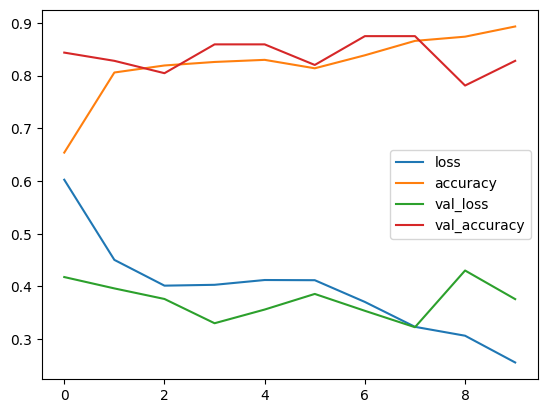

In [24]:
pd.DataFrame(history2.history).plot()

as plotting shows,lets increase epochs,maybe it will work

In [25]:
history3 = model2.fit(train_data,
           epochs=15,
           validation_data=test_data,
           validation_steps=(0.2*len(test_data)),
                             verbose=2)

Epoch 1/15
47/47 - 5s - loss: 0.2237 - accuracy: 0.9160 - val_loss: 0.4143 - val_accuracy: 0.7734 - 5s/epoch - 111ms/step
Epoch 2/15
47/47 - 6s - loss: 0.2163 - accuracy: 0.9167 - val_loss: 0.4696 - val_accuracy: 0.8359 - 6s/epoch - 123ms/step
Epoch 3/15
47/47 - 5s - loss: 0.2128 - accuracy: 0.9160 - val_loss: 0.6788 - val_accuracy: 0.7266 - 5s/epoch - 108ms/step
Epoch 4/15
47/47 - 6s - loss: 0.1358 - accuracy: 0.9540 - val_loss: 0.3912 - val_accuracy: 0.8438 - 6s/epoch - 122ms/step
Epoch 5/15
47/47 - 5s - loss: 0.1990 - accuracy: 0.9220 - val_loss: 0.4876 - val_accuracy: 0.8281 - 5s/epoch - 105ms/step
Epoch 6/15
47/47 - 6s - loss: 0.1073 - accuracy: 0.9660 - val_loss: 0.9299 - val_accuracy: 0.7578 - 6s/epoch - 124ms/step
Epoch 7/15
47/47 - 5s - loss: 0.0737 - accuracy: 0.9787 - val_loss: 0.8727 - val_accuracy: 0.8125 - 5s/epoch - 103ms/step
Epoch 8/15
47/47 - 6s - loss: 0.0589 - accuracy: 0.9807 - val_loss: 0.6358 - val_accuracy: 0.8594 - 6s/epoch - 123ms/step
Epoch 9/15
47/47 - 5s - 

In [26]:
model2.evaluate(test_data)

16/16 [==============================] - 2s 95ms/step - loss: 1.6740 - accuracy: 0.7880


[1.673989176750183, 0.7879999876022339]

looks like,we are just overfitting

i think for better results,we should try transfer learning

In [27]:
model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,
                                  input_shape=(256,256,3),
                                  activation= tf.keras.activations.relu))

model3.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding="valid"))


model3.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,

                                  activation= tf.keras.activations.relu))


model3.add(tf.keras.layers.MaxPool2D(pool_size=2))

model3.add(tf.keras.layers.Conv2D(filters=10,
                                  kernel_size=3,
                                  activation= tf.keras.activations.relu))

model3.add(tf.keras.layers.MaxPool2D(pool_size=2))

model3.add(tf.keras.layers.Flatten())

model3.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid))

In [28]:
model3.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

In [29]:
history4 = model3.fit(train_data,
           epochs=10,
           validation_data=test_data,
           validation_steps=(0.2*len(test_data)),
                             verbose=2)

Epoch 1/10
47/47 - 7s - loss: 0.6099 - accuracy: 0.6567 - val_loss: 0.4526 - val_accuracy: 0.8281 - 7s/epoch - 156ms/step
Epoch 2/10
47/47 - 8s - loss: 0.4421 - accuracy: 0.8067 - val_loss: 0.3932 - val_accuracy: 0.8594 - 8s/epoch - 171ms/step
Epoch 3/10
47/47 - 6s - loss: 0.4002 - accuracy: 0.8253 - val_loss: 0.3460 - val_accuracy: 0.8750 - 6s/epoch - 120ms/step
Epoch 4/10
47/47 - 5s - loss: 0.3670 - accuracy: 0.8393 - val_loss: 0.3104 - val_accuracy: 0.8828 - 5s/epoch - 104ms/step
Epoch 5/10
47/47 - 6s - loss: 0.3628 - accuracy: 0.8413 - val_loss: 0.3001 - val_accuracy: 0.8594 - 6s/epoch - 119ms/step
Epoch 6/10
47/47 - 5s - loss: 0.3136 - accuracy: 0.8693 - val_loss: 0.3532 - val_accuracy: 0.8438 - 5s/epoch - 104ms/step
Epoch 7/10
47/47 - 9s - loss: 0.3014 - accuracy: 0.8800 - val_loss: 0.2538 - val_accuracy: 0.8906 - 9s/epoch - 198ms/step
Epoch 8/10
47/47 - 8s - loss: 0.2873 - accuracy: 0.8907 - val_loss: 0.2472 - val_accuracy: 0.8828 - 8s/epoch - 171ms/step
Epoch 9/10
47/47 - 5s - 

In [30]:
model3.evaluate(test_data)

16/16 [==============================] - 2s 126ms/step - loss: 0.2859 - accuracy: 0.8840


[0.28590765595436096, 0.8840000033378601]

lets create more complex model

In [31]:
model4 = tf.keras.Sequential()

model4.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,
                                  input_shape=(256,256,3),
                                  activation= tf.keras.activations.relu))

model4.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding="valid"))


model4.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,

                                  activation= tf.keras.activations.relu))


model4.add(tf.keras.layers.MaxPool2D(pool_size=2))

model4.add(tf.keras.layers.Conv2D(filters=10,
                                  kernel_size=3,
                                  activation= tf.keras.activations.relu))

model4.add(tf.keras.layers.MaxPool2D(pool_size=2))

model4.add(tf.keras.layers.Conv2D(filters=10,
                                  kernel_size=3,
                                  activation= tf.keras.activations.relu))

model4.add(tf.keras.layers.MaxPool2D(pool_size=2))

model4.add(tf.keras.layers.Conv2D(filters=10,
                                  kernel_size=3,
                                  activation= tf.keras.activations.relu))

model4.add(tf.keras.layers.MaxPool2D(pool_size=2))

model4.add(tf.keras.layers.Flatten())

model4.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid))

In [32]:
model4.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

In [33]:
history5 = model4.fit(train_data,
           epochs=10,
           validation_data=test_data,
           validation_steps=(0.2*len(test_data)),
                             verbose=2)

Epoch 1/10
47/47 - 8s - loss: 0.6827 - accuracy: 0.5747 - val_loss: 0.6483 - val_accuracy: 0.6172 - 8s/epoch - 162ms/step
Epoch 2/10
47/47 - 6s - loss: 0.5584 - accuracy: 0.7287 - val_loss: 0.4697 - val_accuracy: 0.7969 - 6s/epoch - 124ms/step
Epoch 3/10
47/47 - 5s - loss: 0.4712 - accuracy: 0.7913 - val_loss: 0.4179 - val_accuracy: 0.7969 - 5s/epoch - 105ms/step
Epoch 4/10
47/47 - 5s - loss: 0.4333 - accuracy: 0.8080 - val_loss: 0.3501 - val_accuracy: 0.8828 - 5s/epoch - 114ms/step
Epoch 5/10
47/47 - 5s - loss: 0.4079 - accuracy: 0.8227 - val_loss: 0.3077 - val_accuracy: 0.8594 - 5s/epoch - 108ms/step
Epoch 6/10
47/47 - 5s - loss: 0.3976 - accuracy: 0.8320 - val_loss: 0.3002 - val_accuracy: 0.8750 - 5s/epoch - 105ms/step
Epoch 7/10
47/47 - 6s - loss: 0.3804 - accuracy: 0.8433 - val_loss: 0.2596 - val_accuracy: 0.8906 - 6s/epoch - 118ms/step
Epoch 8/10
47/47 - 5s - loss: 0.3752 - accuracy: 0.8513 - val_loss: 0.2815 - val_accuracy: 0.8906 - 5s/epoch - 116ms/step
Epoch 9/10
47/47 - 6s - 

In [34]:
model4.evaluate(test_data)

16/16 [==============================] - 2s 98ms/step - loss: 0.3321 - accuracy: 0.8460


[0.33211153745651245, 0.8460000157356262]

is is great

lets see the plot

<Axes: >

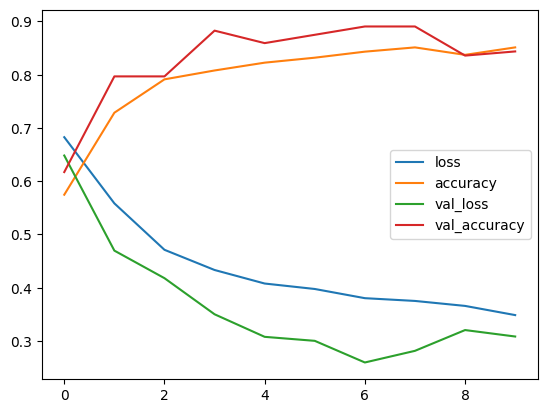

In [35]:
pd.DataFrame(history5.history).plot()

i think with transfer learning we can pass,90 percent

but for the last time,lets see if we can improve our model's performance,by augmneting our data

In [37]:
train_data_aug_generator = ImageDataGenerator(rescale=1./255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True
                                              )

In [38]:
train_data_augmented = train_data_aug_generator.flow_from_directory(train_data_path,
                                                                    shuffle=True,
                                                                    target_size=(256,256),
                                                                    class_mode="binary",
                                                                    batch_size=32)

Found 1500 images belonging to 2 classes.


In [39]:
model5 = tf.keras.Sequential()

model5.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,
                                  input_shape=(256,256,3),
                                  activation= tf.keras.activations.relu))

model5.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding="valid"))


model5.add(tf.keras.layers.Conv2D(filters=12,
                                  kernel_size=3,

                                  activation= tf.keras.activations.relu))


model5.add(tf.keras.layers.MaxPool2D(pool_size=2))

model5.add(tf.keras.layers.Conv2D(filters=10,
                                  kernel_size=3,
                                  activation= tf.keras.activations.relu))

model5.add(tf.keras.layers.MaxPool2D(pool_size=2))

model5.add(tf.keras.layers.Conv2D(filters=10,
                                  kernel_size=3,
                                  activation= tf.keras.activations.relu))

model5.add(tf.keras.layers.MaxPool2D(pool_size=2))

model5.add(tf.keras.layers.Conv2D(filters=10,
                                  kernel_size=3,
                                  activation= tf.keras.activations.relu))

model5.add(tf.keras.layers.MaxPool2D(pool_size=2))

model5.add(tf.keras.layers.Flatten())

model5.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid))

In [40]:
model5.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

In [46]:
history6 = model5.fit(train_data_augmented,
           epochs=10,
           validation_data=test_data,
           validation_steps=int(0.3*(len(test_data))),
           verbose=2)

Epoch 1/10
47/47 - 26s - loss: 0.6916 - accuracy: 0.5487 - val_loss: 0.6784 - val_accuracy: 0.6719 - 26s/epoch - 560ms/step
Epoch 2/10
47/47 - 25s - loss: 0.6267 - accuracy: 0.6553 - val_loss: 0.4977 - val_accuracy: 0.7812 - 25s/epoch - 538ms/step
Epoch 3/10
47/47 - 25s - loss: 0.5552 - accuracy: 0.7327 - val_loss: 0.4270 - val_accuracy: 0.8047 - 25s/epoch - 530ms/step
Epoch 4/10
47/47 - 25s - loss: 0.5196 - accuracy: 0.7553 - val_loss: 0.3655 - val_accuracy: 0.8516 - 25s/epoch - 526ms/step
Epoch 5/10
47/47 - 25s - loss: 0.4948 - accuracy: 0.7793 - val_loss: 0.4008 - val_accuracy: 0.8438 - 25s/epoch - 529ms/step
Epoch 6/10
47/47 - 25s - loss: 0.4809 - accuracy: 0.7753 - val_loss: 0.2877 - val_accuracy: 0.8828 - 25s/epoch - 531ms/step
Epoch 7/10
47/47 - 24s - loss: 0.4892 - accuracy: 0.7740 - val_loss: 0.2773 - val_accuracy: 0.9219 - 24s/epoch - 516ms/step
Epoch 8/10
47/47 - 25s - loss: 0.4576 - accuracy: 0.7940 - val_loss: 0.3767 - val_accuracy: 0.8516 - 25s/epoch - 525ms/step
Epoch 9/

In [47]:
model5.evaluate(test_data)

16/16 [==============================] - 2s 114ms/step - loss: 0.3359 - accuracy: 0.8760


[0.3359222412109375, 0.8759999871253967]

it looks like,we are at the limit of this model

lets use our last weapon,to strike this motherfucker dataset

In [48]:
import tensorflow_hub as hub

i want to use efficient net

In [49]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [58]:
layer_of_transfer = hub.KerasLayer(efficientnet_url,
                                  trainable=False,
                                  input_shape=(256, 256, 3))

In [60]:
model6 = tf.keras.Sequential()

model6.add(layer_of_transfer)

model6.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid))

In [61]:
model6.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

In [65]:
history7 = model6.fit(train_data_augmented,
           epochs=10,
           validation_data=test_data,
           validation_steps=int(0.3*(len(test_data))),
           verbose=2)

Epoch 1/10
47/47 - 26s - loss: 0.0534 - accuracy: 0.9820 - val_loss: 0.0106 - val_accuracy: 1.0000 - 26s/epoch - 563ms/step
Epoch 2/10
47/47 - 26s - loss: 0.0518 - accuracy: 0.9867 - val_loss: 0.0477 - val_accuracy: 0.9922 - 26s/epoch - 562ms/step
Epoch 3/10
47/47 - 26s - loss: 0.0490 - accuracy: 0.9833 - val_loss: 0.0087 - val_accuracy: 1.0000 - 26s/epoch - 560ms/step
Epoch 4/10
47/47 - 26s - loss: 0.0452 - accuracy: 0.9867 - val_loss: 0.0099 - val_accuracy: 1.0000 - 26s/epoch - 562ms/step
Epoch 5/10
47/47 - 26s - loss: 0.0420 - accuracy: 0.9873 - val_loss: 0.0520 - val_accuracy: 0.9844 - 26s/epoch - 561ms/step
Epoch 6/10
47/47 - 26s - loss: 0.0432 - accuracy: 0.9893 - val_loss: 0.0477 - val_accuracy: 0.9922 - 26s/epoch - 557ms/step
Epoch 7/10
47/47 - 26s - loss: 0.0381 - accuracy: 0.9867 - val_loss: 0.0534 - val_accuracy: 0.9922 - 26s/epoch - 556ms/step
Epoch 8/10
47/47 - 26s - loss: 0.0380 - accuracy: 0.9873 - val_loss: 0.0140 - val_accuracy: 0.9922 - 26s/epoch - 554ms/step
Epoch 9/

In [66]:
model6.evaluate(test_data)

16/16 [==============================] - 2s 104ms/step - loss: 0.0198 - accuracy: 0.9960


[0.019771724939346313, 0.9959999918937683]

<Axes: >

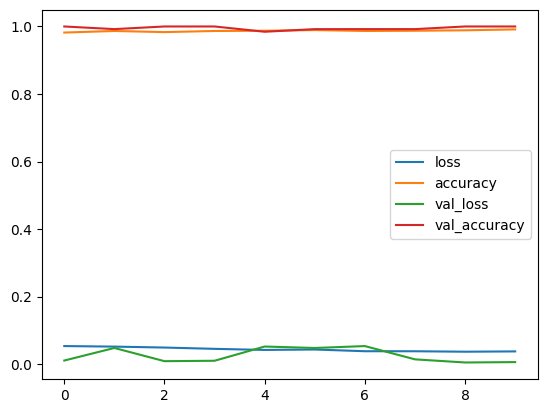

In [67]:
pd.DataFrame(history7.history).plot()

i think,we are at the top of the mountain

and our model,just needed transfer learning :))

In [89]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense_5 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4050845 (15.45 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________
